In [1]:
from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:

url= "https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/bank_modified.csv"
df=pd.read_csv(url)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [7]:
df['y_yes'].value_counts(normalize=True)#verificar porcentaje de elementos

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

#Regresión Logística

In [8]:
#variables y vector objetivo 
X=df.drop(columns='y_yes')
y=df['y_yes']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y )

In [10]:
y_test.value_counts(normalize=True)

0    0.885041
1    0.114959
Name: y_yes, dtype: float64

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
params = {'penalty' : ['l1', 'l2'], 'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
          'class_weight' : [None, 'balanced']}

In [15]:
log_reg = LogisticRegression(solver = 'liblinear')
gs = GridSearchCV(log_reg, params, cv = 5)
gs.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [17]:
gs.best_params_#los mejores parametros

{'C': 0.1, 'class_weight': None, 'penalty': 'l1'}

In [18]:
print('Training accuracy', gs.score(X_train, y_train))
print('Testing accuracy', gs.score(X_test, y_test))

Training accuracy 0.8919089759797725
Testing accuracy 0.8865143699336773


In [19]:
pred = gs.predict(X_test) #guardar la predicción

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


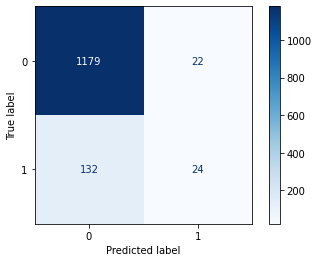

In [21]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d'); #matriz de confusión

In [23]:
#guardas la matriz de confución
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
#sensibilidad
sensibilidad = tp / (tp + fn)
print(sensibilidad)

0.15384615384615385


In [25]:
#especificidad
especificidad = tn / (tn + fp)
print(especificidad)

0.9816819317235637


In [26]:
#AUC ROC 
roc_auc_score(y_test, gs.predict_proba(X_test)[:,1])

0.8451450714148466

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


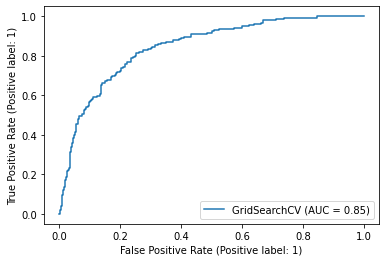

In [27]:
#curva ROC
plot_roc_curve(gs, X_test, y_test);

In [ ]:
#¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? 
#--Ambos son similare, el modelo de regresion logistica tiene una presición de 88,6% y el modelo base de 88,5%


In [28]:
#¿De qué otras formas podrías mejorar este modelo?
#Con herramientas y tecnicas para compensar el desbalance de la base de datos en el vector objetivo